#### Written by Erich Zimmer
#### Created at 20210813, 0108 CTZ

In [1]:
from skimage import exposure, filters, util
from openpiv import preprocess as piv_pre
import openpiv.tools as piv_tls
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# Spatial filters

In [2]:
i1 = '../test12/A001a.tif'
i2 = '../test12/A001b.tif'
i3 = '../test12/A002a.tif'
i4 = '../test12/A002b.tif'
img_list = [i1, i2, i3, i4]

Text(0.5, 1.0, 'Local variance normalization')

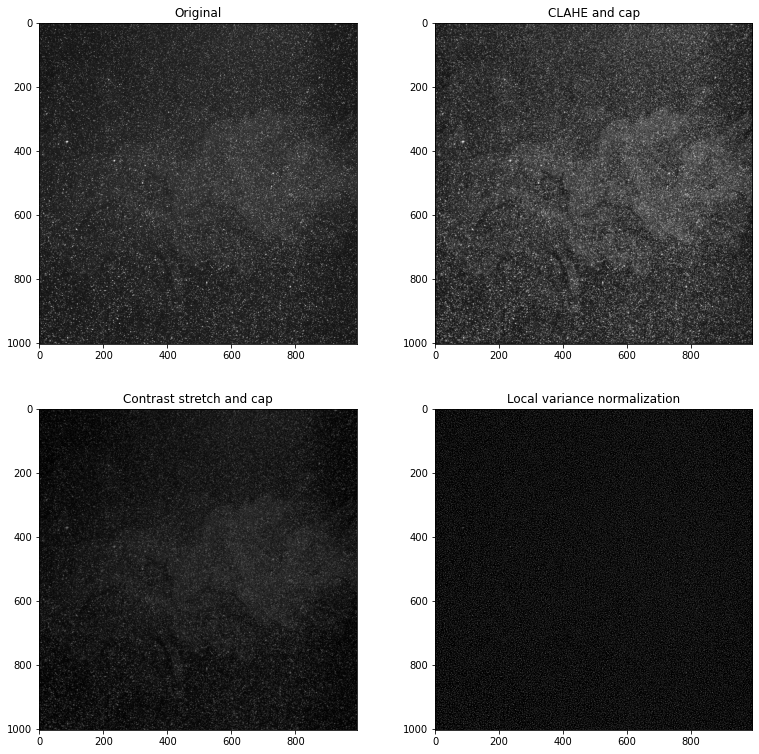

In [3]:
# its a good idea to normalize arrays to [0, 1] float, but not needed
img = piv_pre.normalize_array(piv_tls.imread(i1)) 
img_CLAHE = exposure.equalize_adapthist(
    img.copy(), 
    kernel_size = None, 
    clip_limit  = 0.01,
    nbins       = 256
)
img_CLAHE = piv_pre.instensity_cap(img_CLAHE, 4)
img_str = piv_pre.contrast_stretch(img.copy(), 2, 99)
img_str = piv_pre.instensity_cap(img_str, 2)
img_norm = piv_pre.local_variance_normalization(img.copy(), 2, 1.5, 'zero')
fig, ax = plt.subplots(2,2, figsize = (13, 13))
ax[0,0].imshow(img*255, cmap = plt.cm.gray, vmax = 255)
ax[0,1].imshow(img_CLAHE*255, cmap = plt.cm.gray, vmax = 255)
ax[1,0].imshow(img_str*255, cmap = plt.cm.gray, vmax = 255)
ax[1,1].imshow(img_norm*255, cmap = plt.cm.gray, vmax = 255)
ax[0,0].set_title('Original')
ax[0,1].set_title('CLAHE and cap')
ax[1,0].set_title('Contrast stretch and cap')
ax[1,1].set_title('Local variance normalization')

Text(0.5, 1.0, 'local variance norm with threshold binarizing')

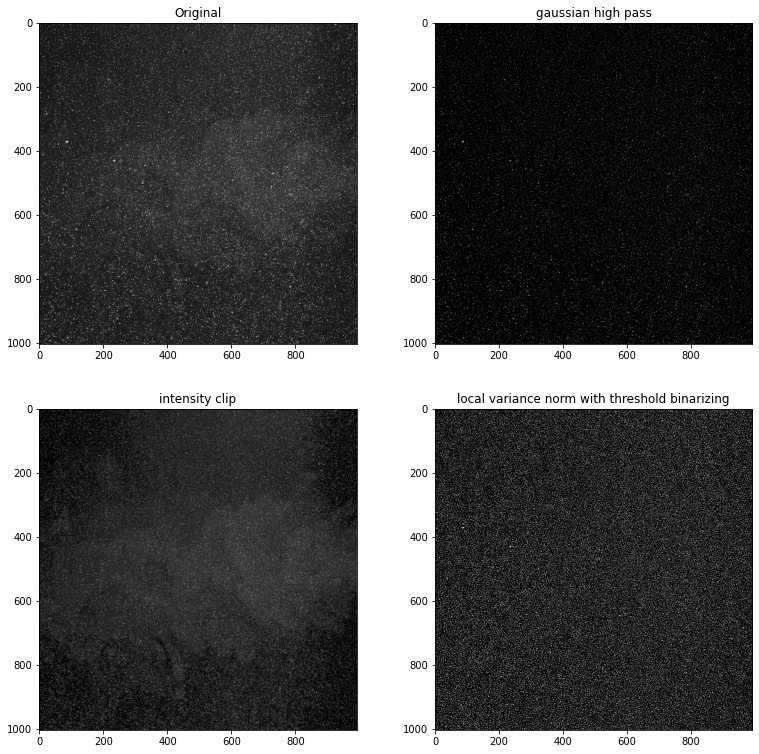

In [4]:
# some additional filters
img = piv_pre.normalize_array(piv_tls.imread(i1)) 

img_hp = piv_pre.high_pass(img.copy(), 5, clip = True) 
img_cp = piv_pre.intensity_clip(img.copy(), 0.1, 0.99, 'clip')
img_norm = piv_pre.local_variance_normalization(img.copy(), 2, 1.5, 'zero')
img_bin = piv_pre.threshold_binarize(img_norm, 0.1, 1) # this doesn't work anymore?
fig, ax = plt.subplots(2,2, figsize = (13, 13))
ax[0,0].imshow(img*255, cmap = plt.cm.gray, vmax = 255)
ax[0,1].imshow(img_hp*255, cmap = plt.cm.gray, vmax = 255)
ax[1,0].imshow(img_cp*255, cmap = plt.cm.gray, vmax = 255)
ax[1,1].imshow(img_bin*255, cmap = plt.cm.gray, vmax = 255)
ax[0,0].set_title('Original')
ax[0,1].set_title('gaussian high pass')
ax[1,0].set_title('intensity clip')
ax[1,1].set_title('local variance norm with threshold binarizing')

In [5]:
i1 = '../test13/00020359.bmp'
i2 = '../test13/00020360.bmp'
i3 = '../test13/00020361.bmp'
i4 = '../test13/00020362.bmp'
img_list = [i1, i2, i3, i4]

### Temporal filters for background subtraction
 Currently two filters are implemented: temporal averaging and temporal low pass. Apply by subtracting the image of interest with the generated background image.

In [6]:
# temporal filtering
background_mean = piv_pre.gen_mean_background(img_list, resize = 255)
# works better than mean of images for low amount of images, produces less invalid vectors 
background_low = piv_pre.gen_lowpass_background(img_list, resize = 255) 
# normalizing can be disabled by setting »resize« to None

Text(0.5, 1.0, 'Temporal high pass')

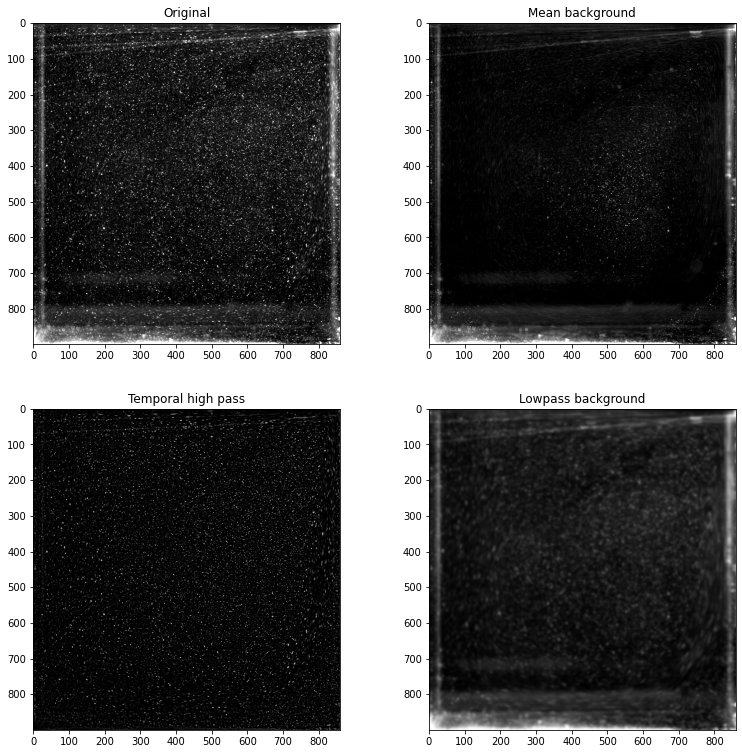

In [7]:
fig, ax = plt.subplots(2,2, figsize = (13, 13))
img = piv_pre.normalize_array(piv_tls.imread(i1))*255
new_img = img - background_low
new_img[new_img < 0] = 0
ax[0,0].imshow(img, cmap = plt.cm.gray, vmax = 255)
ax[0,1].imshow(background_mean, cmap = plt.cm.gray, vmax = 255)
ax[1,1].imshow(background_low, cmap = plt.cm.gray, vmax = 255)
ax[1,0].imshow(new_img, cmap = plt.cm.gray, vmax = 255)
ax[0,0].set_title('Original')
ax[0,1].set_title('Mean background')
ax[1,1].set_title('Lowpass background')
ax[1,0].set_title('Temporal high pass')

### Transformations
Offsetting one image can be useful when frame straddling two offset cameras with a similar field of view.

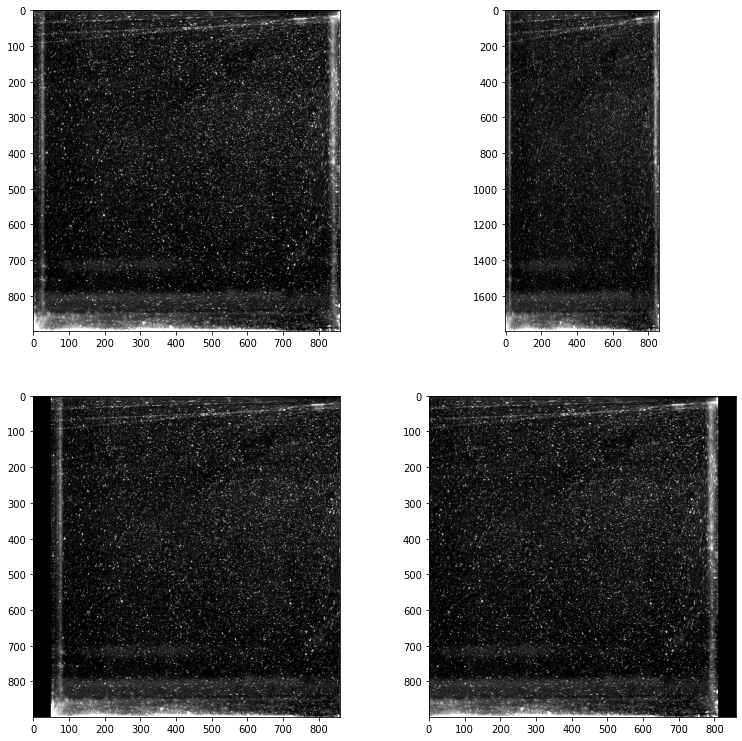

In [8]:
img = piv_pre.normalize_array(piv_tls.imread(i1))*255
fig, ax = plt.subplots(2,2, figsize = (13, 13))
ax[0,0].imshow(img, cmap = plt.cm.gray, vmax = 255)
ax[0,1].imshow(piv_pre.stretch_image(img, 0, 1), cmap = plt.cm.gray, vmax = 255)
ax[1,0].imshow(piv_pre.offset_image(img, 50, 0), cmap = plt.cm.gray, vmax = 255)
ax[1,1].imshow(piv_pre.offset_image(img, -50, 0), cmap = plt.cm.gray, vmax = 255)